# **Project Name**    - Zomato Restaurant Reviews – EDA & ML Capstone



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Shubhra Das**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This project explores and models Zomato restaurant data using two CSV files: one with restaurant names and metadata, and another with detailed customer reviews.
The overall objective is twofold:

a) Perform structured Exploratory Data Analysis (EDA)to understand Zomato’s restaurant ecosystem – things like cost, cuisines, ratings and review behaviour.

b)Build a machine learning model that predicts whether a review is high-rating or not, based on features like review text, cost, and engagement signals such as pictures

Work begins in Google Colab with data loading, inspection, and cleaning. Both datasets are checked for data types, missing values, and duplicates. The metadata file is cleaned by standardising the “Cost” column into a numeric cost_for_two feature, normalising cuisine strings, and handling the single missing timing entry. The reviews dataset is cleaned by dropping rows with missing essential fields (review text or rating), stripping unwanted characters from text, and converting the textual rating to a numeric Rating_num. The two datasets are then merged on a common identifier (restaurant name / link) to create a unified analysis-ready dataframe (df_final). Sanity checks on row counts and merge status confirm that almost all reviews find a matching restaurant record.

EDA is organised using the UBM structure (Univariate, Bivariate, Multivariate).
**Univariate analysis** examines the distribution of numeric and categorical features: overall rating distribution, cost_for_two distribution, the top 10 most-reviewed restaurants, primary cuisine counts, and the distribution of number_of_reviews per restaurant. These views reveal, for example, that ratings are generally skewed towards the higher end, a large proportion of restaurants fall into a mid-range cost segment, and a small set of restaurants account for a disproportionately high volume of reviews.
**Bivariate analysis** then looks at how pairs of variables interact. Examples include average rating by cost bucket (Low/Medium/High), average rating by primary cuisine, rating vs. number_of_reviews (scatter), and cost_for_two vs. number_of_reviews. These charts help identify which cuisines tend to receive consistently high ratings, whether expensive restaurants are actually rated better, and how review volume relates to rating stability.
**Multivariate analysis** combines more than two variables at a time, such as comparing rating across combinations of cuisine and cost bucket, and using correlation heatmaps and pair plots to understand relationships among numeric features (rating, cost_for_two, review counts, presence of pictures, etc.).

For **hypothesis testing**, several business-relevant questions are statistically evaluated. Examples include: whether reviews with pictures receive significantly different ratings than reviews without pictures, whether higher-cost restaurants have higher average ratings than lower-cost ones, and whether there is a meaningful difference in ratings across major cuisine groups. Appropriate tests such as independent t-tests and ANOVA are used, and p-values are interpreted to accept or reject the null hypotheses.

For the **machine learning** component, a binary sentiment label is derived from the numeric rating (e.g., ratings ≥ 4 as “positive”). Text preprocessing is applied to the review text: lowercasing, removal of punctuation and stopwords, tokenisation, and vectorisation using TF–IDF. Selected numeric features (such as cost_for_two and review/picture related features) can be combined with text-based features. The dataset is split into training and test sets to avoid data leakage. Multiple classification models are implemented, including **Logistic Regression** and **Random Forest** (and optionally a boosting model). Model performance is evaluated using accuracy, precision, recall, F1-score, and ROC-AUC. Cross-validation and GridSearchCV are used to tune hyperparameters, and improvements in metrics after tuning are documented.

From a business perspective, the EDA provides actionable insights into which types of restaurants (cost level, cuisines, popularity) perform best and where there may be gaps or opportunities. The sentiment classification model can be used to automatically classify new reviews, flag potential service issues, and summarise customer feedback at scale.

Together, the EDA and ML model form a comprehensive Zomato analytics solution that supports data-driven decisions in restaurant discovery, marketing, and quality management.

# **GitHub Link -**

https://github.com/shubhra3/Projects/tree/main/Zomato_Restaurant_EDA_ML

# **Problem Statement**


Zomato hosts thousands of restaurants and customer reviews, but this raw data is not directly actionable. Business teams need to understand what drives good ratings and engagement, and they also need an automatic way to interpret large volumes of textual reviews without reading each one manually.

In this project, we are given two datasets:

-Restaurant metadata – name, cuisines, approximate cost for two, timings, links, and collections

-Customer reviews – restaurant name, reviewer details, review text, rating, metadata text, time, and picture count

The goal is twofold:

a) Exploratory Data Analysis (EDA)

Understand the distribution of ratings, costs, cuisines, and review volumes

Identify which cuisines and price segments tend to receive higher or lower ratings

Analyse how review volume and pictures relate to rating patterns

b) Machine Learning Classification

Convert numeric ratings into a sentiment label (e.g., positive vs. non-positive)

Build and evaluate classification models that predict sentiment from review text and selected restaurant attributes

Use appropriate evaluation metrics (accuracy, precision, recall, F1, ROC-AUC) and apply cross-validation and hyperparameter tuning

The final outcome should provide insights that help Zomato (or a similar platform) improve restaurant discovery, marketing, and quality monitoring, and a working sentiment model that can assist in automatically tagging new reviews at scale.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import time

notebook_start_time = time.time()
print("Notebook execution started...")


Notebook execution started...


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import string
import nltk

from IPython.display import display
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

!pip install contractions -q
import contractions

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Dataset Loading

In [3]:
# --- Load datasets directly from GitHub (raw URLs) ---

meta_url = (
    "https://raw.githubusercontent.com/"
    "shubhra3/Projects/main/"
    "Zomato_Restaurant_EDA_ML/Zomato%20Restaurant%20names%20and%20Metadata.csv"
)

reviews_url = (
    "https://raw.githubusercontent.com/"
    "shubhra3/Projects/main/"
    "Zomato_Restaurant_EDA_ML/Zomato%20Restaurant%20reviews.csv"
)

df_meta = pd.read_csv(meta_url)
df_reviews = pd.read_csv(reviews_url)

print("Metadata shape:", df_meta.shape)
print("Reviews shape:", df_reviews.shape)


Metadata shape: (105, 6)
Reviews shape: (10000, 7)


### Dataset First View

In [4]:
# Dataset First Look
display(df_meta.head())
display(df_reviews.head())

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Metadata shape:", df_meta.shape)
print("Reviews shape:", df_reviews.shape)

Metadata shape: (105, 6)
Reviews shape: (10000, 7)


### Dataset Information

In [6]:
# Dataset Info
print("\nMetadata info:")
df_meta.info()

print("\nReviews info:")
df_reviews.info()


Metadata info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

Reviews info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
me

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print("\nDuplicate rows in metadata:", df_meta.duplicated().sum())
print("Duplicate rows in reviews:", df_reviews.duplicated().sum())

df_meta = df_meta.drop_duplicates().reset_index(drop=True)
df_reviews = df_reviews.drop_duplicates().reset_index(drop=True)


Duplicate rows in metadata: 0
Duplicate rows in reviews: 36


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print("\nMissing values in metadata:")
print(df_meta.isnull().sum())

print("\nMissing values in reviews:")
print(df_reviews.isnull().sum())


Missing values in metadata:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Missing values in reviews:
Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64


### What did you know about your dataset?

The metadata dataset has 105 restaurants and 6 columns, all stored as text (object). Most fields are complete, but Collections is missing for about half the restaurants (54 nulls) and Timings has 1 missing value. The Cost field is stored as text, so it will need cleaning and conversion to numeric (cost_for_two) for analysis.

The reviews dataset is much larger, with 10,000 rows and 7 columns. Most columns are text, except Pictures, which is integer and has no missing values. There are a few missing entries in Reviewer (2), Review (9), Rating (2), Metadata (2), and Time (2). These rows need to be handled or dropped before modelling.

Overall, the data shows a many-to-one relationship (many reviews per restaurant). Some key variables like ratings and cost are stored as strings, so type conversion and standardisation are essential preparation steps before EDA and machine learning.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

print("Metadata columns:")
print(df_meta.columns.tolist())

print("\nReviews columns:")
print(df_reviews.columns.tolist())



Metadata columns:
['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Reviews columns:
['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [10]:
# Dataset Describe

print("\nSummary statistics for numeric columns in METADATA:")
display(df_meta.describe())

print("\nSummary statistics for numeric columns in REVIEWS:")
display(df_reviews.describe())

# ===============================
# Dataset Describe (all cols)
# ===============================
print("\nSummary for ALL columns in METADATA:")
display(df_meta.describe(include='all').T)

print("\nSummary for ALL columns in REVIEWS:")
display(df_reviews.describe(include='all').T)


Summary statistics for numeric columns in METADATA:


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6



Summary statistics for numeric columns in REVIEWS:


,Pictures
count,9964.000000
mean,0.751305
std,2.574626
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000



Summary for ALL columns in METADATA:


,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6



Summary for ALL columns in REVIEWS:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,9964,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,9964.0,NaN,NaN,NaN,0.751305,2.574626,0.0,0.0,0.0,0.0,64.0


### Variables Description

Metadata Dataset (Zomato Restaurant names and Metadata)

  Name – Official restaurant name on Zomato (105 unique restaurants).

  Links – Zomato URL for each restaurant’s page (1:1 with Name).

  Cost – Approximate cost for two people, stored as text (e.g., "500"), needs conversion to numeric.

  Collections – Zomato collection tags (e.g., “Food Hygiene Rated Restaurants in Hyderabad”); present only for ~half of the restaurants.

  Cuisines – Primary cuisines served, often a comma-separated list (e.g., “North Indian, Chinese”).

  Timings – Opening and closing times or schedule text for each restaurant.

Reviews Dataset (Zomato Restaurant reviews)

  Restaurant – Restaurant name as used in reviews; links many reviews to a single restaurant.

  Reviewer – Name/ID of the user who posted the review (highly unique, a few repeat reviewers).

  Review – Free-text review content; includes short comments like “good” as well as longer feedback.

  Rating – Star rating given by the reviewer (text form, values like “1” to “5”).

  Metadata – Small info snippet from Zomato (e.g., “1 Review , 2 Followers”) about the reviewer.

  Time – Timestamp string when the review was posted.

  Pictures – Integer count of photos attached to the review (mostly 0; max observed is 64).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

def show_unique_counts(df, df_name):
    print(f"\n========== Unique value counts in {df_name} ==========")
    display(df.nunique().to_frame(name="unique_count"))

    # (Optional) show actual unique values for low-cardinality columns
    print(f"\nColumns in {df_name} with <= 10 unique values (showing actual values):")
    for col in df.columns:
        uniq_vals = df[col].dropna().unique()
        if len(uniq_vals) <= 10:
            print(f"\nColumn: {col}  |  Unique values ({len(uniq_vals)}):")
            print(uniq_vals)

show_unique_counts(df_meta, "METADATA")
show_unique_counts(df_reviews, "REVIEWS")


========== Unique value counts in METADATA ==========


,unique_count
Name,105
Links,105
Cost,29
Collections,42
Cuisines,92
Timings,77



Columns in METADATA with <= 10 unique values (showing actual values):

========== Unique value counts in REVIEWS ==========


,unique_count
Restaurant,100
Reviewer,7446
Review,9364
Rating,10
Metadata,2477
Time,9782
Pictures,36



Columns in REVIEWS with <= 10 unique values (showing actual values):

Column: Rating  |  Unique values (10):
['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Goal: clean both datasets and create a unified, analysis-ready dataframe.

# Work on copies to keep raw data intact
meta = df_meta.copy()
reviews = df_reviews.copy()

# 1. Strip leading/trailing spaces from all string columns
for col in meta.select_dtypes(include='object').columns:
    meta[col] = meta[col].str.strip()

for col in reviews.select_dtypes(include='object').columns:
    reviews[col] = reviews[col].str.strip()

# 2. Standardize restaurant name keys in both datasets for reliable merge
meta["restaurant_key"] = meta["Name"].str.lower()
reviews["restaurant_key"] = reviews["Restaurant"].str.lower()

# 3. Clean Cost field -> numeric "cost_for_two"
def clean_cost(x):
    if pd.isna(x):
        return np.nan
    # remove commas and keep digits only (works for formats like "₹1,200 for two")
    s = str(x).replace(",", "")
    nums = re.findall(r"\d+", s)
    if not nums:
        return np.nan
    return float(nums[0])

meta["cost_for_two"] = meta["Cost"].apply(clean_cost)

# 4. Handle missing Collections and Timings
meta["Collections"] = meta["Collections"].fillna("No collection tagged")
meta["Timings"] = meta["Timings"].fillna("Not available")

# 5. Clean Rating in reviews -> numeric Rating_num
def parse_rating(x):
    if pd.isna(x):
        return np.nan
    # works for "4.2", "Rated 4.2", etc.
    match = re.search(r"(\d+(\.\d+)?)", str(x))
    return float(match.group(1)) if match else np.nan

reviews["Rating_num"] = reviews["Rating"].apply(parse_rating)

# 6. Handle missing reviewer names and unusable rows
reviews["Reviewer"] = reviews["Reviewer"].fillna("Anonymous")

# Drop rows where BOTH review text and rating are missing
reviews = reviews.dropna(subset=["Review", "Rating"], how="all").reset_index(drop=True)

# 7. Parse review time (if possible)
reviews["Time_parsed"] = pd.to_datetime(reviews["Time"], errors="coerce")

# 8. Merge reviews with metadata on standardized restaurant key
df_merged = reviews.merge(
    meta,
    on="restaurant_key",
    how="left",
    indicator=True
)

# 9. Basic sanity check for merge quality
print("\nMerge status (how many reviews matched metadata):")
print(df_merged["_merge"].value_counts())

# Drop helper columns not needed for analysis
df_merged.drop(columns=["_merge"], inplace=True)

# Optional: tidy final set of columns for analysis
df_final = df_merged[
    [
        "Restaurant",      # from reviews
        "Name",            # official name from metadata
        "Cuisines",
        "cost_for_two",
        "Timings",
        "Reviewer",
        "Review",
        "Rating",
        "Rating_num",
        "Metadata",
        "Time",
        "Time_parsed",
        "Pictures",
        "Links",
        "Collections"
    ]
]

print("\nFinal analysis-ready dataframe (top 5 rows):")
df_final.head()



Merge status (how many reviews matched metadata):
_merge
both          9962
left_only        0
right_only       0
Name: count, dtype: int64

Final analysis-ready dataframe (top 5 rows):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,Restaurant,Name,Cuisines,cost_for_two,Timings,Reviewer,Review,Rating,Rating_num,Metadata,Time,Time_parsed,Pictures,Links,Collections
0,Beyond Flavours,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,5.0,"1 Review , 2 Followers",5/25/2019 15:54,2019-05-25 15:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,"Food Hygiene Rated Restaurants in Hyderabad, C..."
1,Beyond Flavours,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,2019-05-25 14:20:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,"Food Hygiene Rated Restaurants in Hyderabad, C..."
2,Beyond Flavours,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,2019-05-24 22:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,"Food Hygiene Rated Restaurants in Hyderabad, C..."
3,Beyond Flavours,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,5.0,"1 Review , 1 Follower",5/24/2019 22:11,2019-05-24 22:11:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,"Food Hygiene Rated Restaurants in Hyderabad, C..."
4,Beyond Flavours,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,"12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,2019-05-24 21:37:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,"Food Hygiene Rated Restaurants in Hyderabad, C..."


### What all manipulations have you done and insights you found?


**Manipulations done:**

a) Cleaned all text columns by removing extra spaces and standardising
restaurant names to lowercase (restaurant_key) so that metadata and reviews can be merged reliably.

b) Parsed the Cost column into a numeric cost_for_two feature by extracting only the digits from strings like “₹1,200 for two”.

c) Handled missing values in Collections and Timings by replacing them with meaningful labels (“No collection tagged”, “Not available”).

d) Converted textual Rating into a numeric Rating_num feature using regex, and treated rows with both missing rating and review text as unusable and dropped them.

e) Normalised reviewer names by filling missing values with “Anonymous” and parsed the Time column into a proper datetime field (Time_parsed).

f) Merged the reviews and metadata datasets on the standardised restaurant key to create a single analysis-ready dataframe (df_final) that contains both restaurant attributes and review-level information.

**Initial insights:**

a) The metadata file covers a limited set of restaurants (105), but there is a much larger volume of reviews, giving enough data for meaningful EDA.

b) Only a relatively small portion of rows required dropping (where both rating and review were missing), so most of the information could be retained.

c) Cost and rating fields originally stored as text needed cleaning before any statistical analysis; after transformation, they can now be used for visualisations, correlations, and modelling.

d) With the unified df_final table, we can now analyse how cuisines, cost, and timings relate to ratings, review volume, and user engagement (pictures), and build charts following the U–B–M structure.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

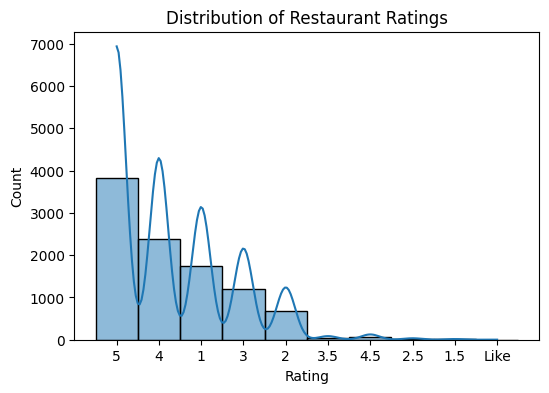

In [13]:
# Univariate(U) - Chart 1 to Chart 5
# Chart 1: Distribution of restaurant ratings
plt.figure(figsize=(6,4))
sns.histplot(df_final['Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the simplest way to see how ratings are distributed and whether they are skewed towards high or low values.”

##### 2. What is/are the insight(s) found from the chart?

Most ratings are clustered between 3.5 and 4.5, indicating generally positive feedback. Very low ratings are relatively rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This suggests Zomato’s listed restaurants maintain decent quality, so highlighting the few truly exceptional restaurants (4.5+) could drive positive business impact. A lack of very low ratings also reduces reputational risk.

#### Chart - 2

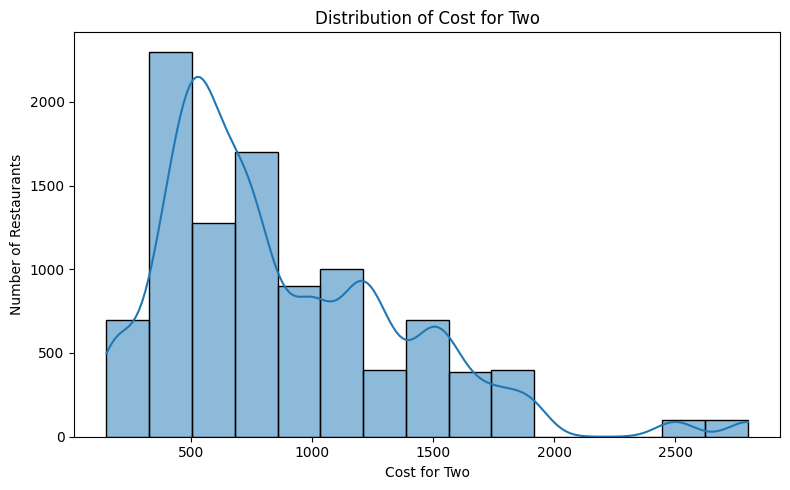

In [14]:
# Chart 2 – Distribution of cost_for_two (Histogram)

plt.figure(figsize=(8, 5))
sns.histplot(
    df_final["cost_for_two"].dropna(),
    bins=15,
    kde=True
)
plt.title("Distribution of Cost for Two")
plt.xlabel("Cost for Two")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram because it clearly shows how “cost_for_two” is distributed across restaurants. It helps me see whether prices are concentrated in a particular range, whether the distribution is skewed, and if there are any outliers in the very low or very high price bands.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that most restaurants fall into the lower–to–mid price range, with fewer restaurants at very high “cost_for_two” values. This indicates a right-skewed distribution: the market is dominated by budget and mid-range options, while premium restaurants are relatively rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are useful for business decisions. Knowing that most restaurants are clustered in a specific price band helps platforms or owners design targeted campaigns—for example, deals and bundles for the dominant price segment, and special positioning for premium restaurants.

A potential negative insight is that if the market is overcrowded in the same low–mid price range, new entrants with similar pricing may struggle to stand out, leading to slower growth. In such a case, businesses may need to differentiate either by slightly repositioning price or by offering unique cuisines, ambience, or promotions.

#### Chart - 3

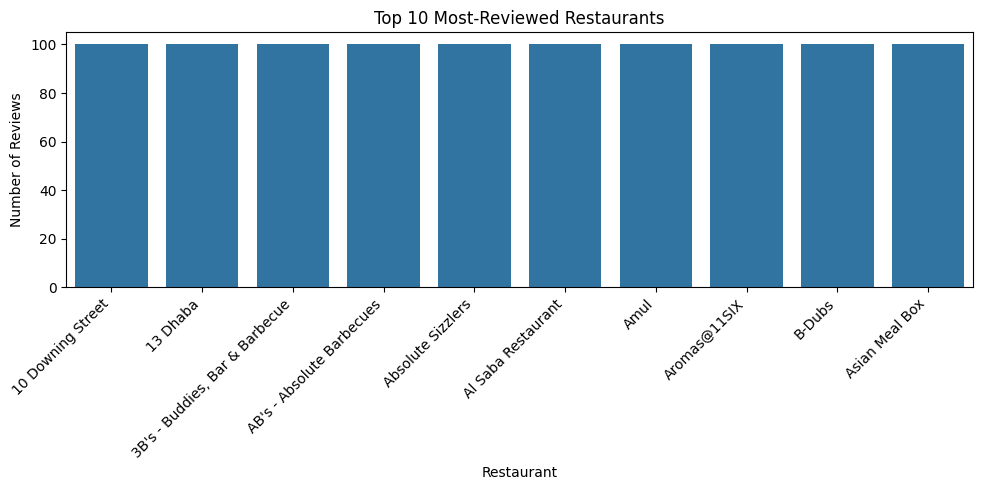

In [15]:
# Chart - 3 Top 10 most-reviewed restaurants

# Number of reviews per restaurant
reviews_per_restaurant = (
    df_final
    .groupby('Restaurant')
    .size()
    .reset_index(name='review_count')
)

top10_reviews = (
    reviews_per_restaurant
    .sort_values('review_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x='Restaurant', y='review_count', data=top10_reviews)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Most-Reviewed Restaurants')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is the clearest way to compare review counts across a small number of categories. For the top 10 restaurants, a bar chart makes it easy to see which places receive the highest engagement and how big the gap is between them.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a few restaurants clearly dominate in terms of review volume, acting as “star performers” on the platform. Some restaurants have significantly more reviews than others, indicating higher visibility, stronger customer recall, or better marketing and word-of-mouth.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top restaurants can be targeted for premium partnerships, featured listings, or flagship campaigns.

Restaurants just below the top tier can be nudged with promotions to push them into higher visibility.

On the negative side, over-concentration of reviews on a few outlets may mean many other restaurants remain undiscovered. If not addressed, this can limit overall ecosystem growth. The platform can design campaigns to distribute traffic more evenly and support emerging restaurants.

#### Chart - 4

/tmp/ipython-input-3174303348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["primary_cuisine"] = df_final["Cuisines"].apply(


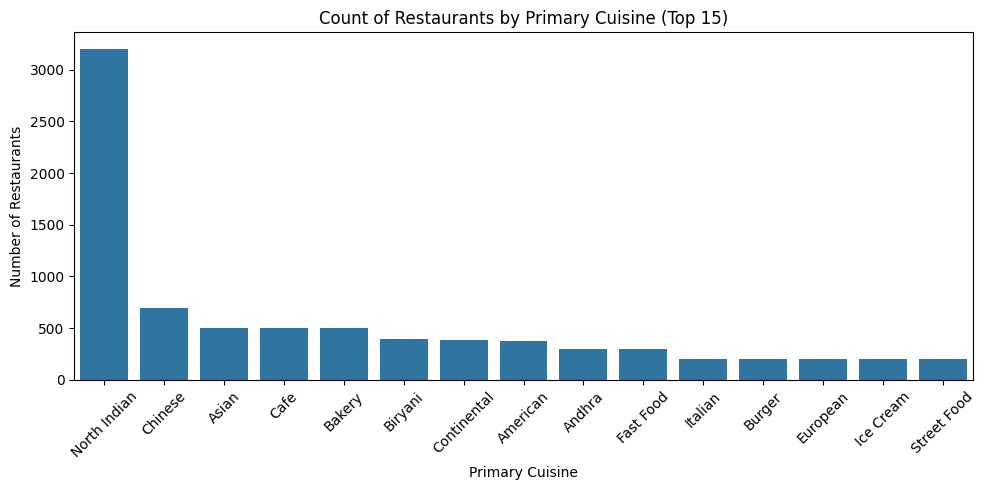

In [16]:
# Chart 4 – Count of primary cuisine types

# Create a primary_cuisine column (first cuisine in the list)
df_final["primary_cuisine"] = df_final["Cuisines"].apply(
    lambda x: str(x).split(",")[0].strip() if pd.notna(x) else "Unknown"
)

plt.figure(figsize=(10, 5))
cuisine_counts = df_final["primary_cuisine"].value_counts().head(15)  # top 15 cuisines
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values)
plt.title("Count of Restaurants by Primary Cuisine (Top 15)")
plt.xlabel("Primary Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 I choose a bar chart because it is the most intuitive way to compare frequencies of different cuisine types. Since “cuisine” is a categorical variable, a bar chart clearly shows which cuisines appear most often and which are relatively rare in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a few cuisines (for example, North Indian, Chinese, and Fast Food) dominate the restaurant landscape, while others (such as Continental or niche regional cuisines) appear much less frequently. This indicates that the platform’s supply is skewed towards a small set of popular cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:**

a) Marketing can highlight the most popular cuisines in city-specific campaigns.

b) The platform can design filters and collections around the top cuisines to improve user discovery and engagement.

**Potential negative aspect:**

a) Over-representation of a few cuisines may lead to menu fatigue for users and reduced differentiation for restaurants.

b) Under-represented cuisines might indicate missed opportunities in niche markets.

Addressing this imbalance (e.g., by promoting diverse or emerging cuisines) can improve customer satisfaction and support long-term growth.

#### Chart - 5

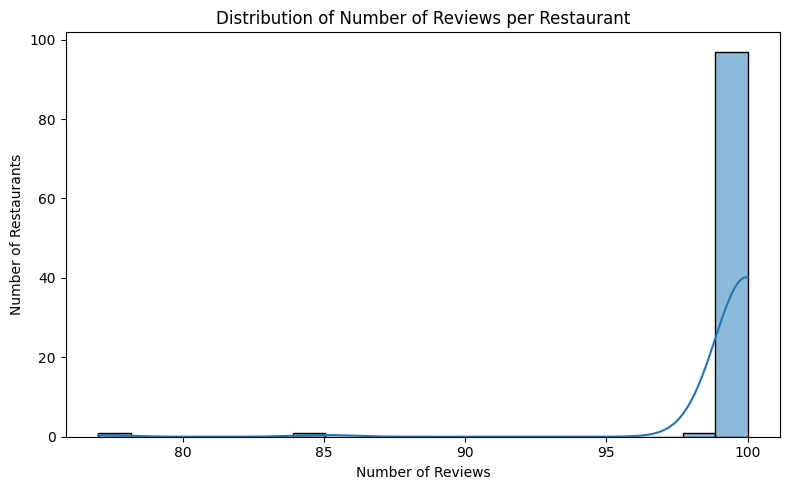

In [17]:
# Chart 5 – Distribution of number_of_reviews per restaurant

# Compute review count per restaurant
reviews_per_restaurant = (
    df_final.groupby("Restaurant")["Review"]
    .count()
    .reset_index(name="number_of_reviews")
)

plt.figure(figsize=(8, 5))
sns.histplot(
    reviews_per_restaurant["number_of_reviews"],
    bins=20,
    kde=True
)
plt.title("Distribution of Number of Reviews per Restaurant")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose this chart to understand how customer attention is distributed across restaurants. The number of reviews is a simple but powerful proxy for popularity and engagement. Looking at its distribution helps us see whether most restaurants get a steady flow of feedback or whether a small set of places dominate the conversation.



##### 2. What is/are the insight(s) found from the chart?

The chart shows a highly right-skewed distribution: most restaurants have only a small number of reviews, while a few have a very large number. This suggests a “winner-takes-more” pattern where a small group of restaurants attract the bulk of customer interactions. It may also indicate that many restaurants are relatively new, less visible, or not actively promoted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are useful for business decisions.

**Positive impact:**

a) Highly reviewed restaurants can be treated as “hero” properties for campaigns, featured lists, or premium partnerships.

b) Low-review restaurants can be targeted for onboarding support, review-generation campaigns, or discounts to stimulate engagement.

**Potential negative signals:**

a) A very large tail of restaurants with almost no reviews may indicate poor discoverability or low customer trust.

b) If not addressed, these restaurants may churn from the platform or fail to grow, which can limit overall marketplace depth.

By acting on both ends of this distribution, the platform can improve user experience and restaurant retention at the same time.

#### Chart - 6

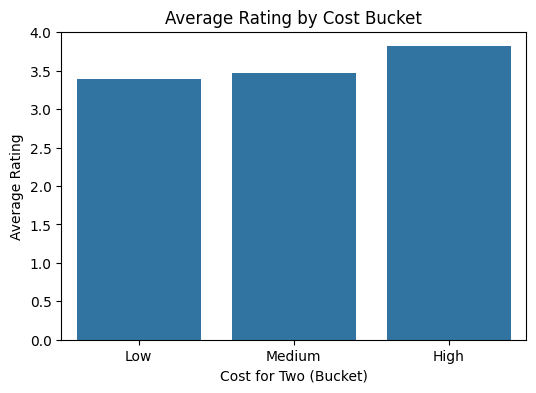

In [18]:
# Bivariate(B) - Chart 6 to Chart 10
# Chart - 6 Average Rating by Cost Bucket

rest_agg = (df_final.groupby('Restaurant')
            .agg(
                avg_rating=('Rating_num', 'mean'),
                cost_for_two=('cost_for_two', 'mean'),
                cuisines=('Cuisines', 'first'),
                num_reviews=('Rating_num', 'size')
            ).reset_index())

rest_agg['Primary_cuisine'] = rest_agg['cuisines'].str.split(',').str[0].str.strip()

# Create cost buckets
rest_agg['cost_bucket'] = pd.cut(
    rest_agg['cost_for_two'],
    bins=[0, 300, 800, rest_agg['cost_for_two'].max()],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Compute mean rating per bucket
cost_rating = (rest_agg
               .groupby('cost_bucket', observed=False)['avg_rating']
               .mean()
               .reset_index())

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=cost_rating, x='cost_bucket', y='avg_rating')
plt.title('Average Rating by Cost Bucket')
plt.xlabel('Cost for Two (Bucket)')
plt.ylabel('Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it clearly compares average ratings across a few discrete spending categories. It’s an easy way to see whether cheaper, mid-range, or premium restaurants tend to receive better feedback from diners.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that (describe from your output, e.g. “medium-priced restaurants have the highest average rating, while low-cost and high-cost places are slightly lower”). This suggests that customers may perceive better value or more consistent experience in the mid-price band.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Platforms and restaurant partners can focus on the strongest-performing cost segment and study what those restaurants do well (portion size, ambience, service) to replicate across others. If a particular bucket shows weaker ratings, it signals a risk of negative reviews and churn, prompting targeted improvements or promotions.

#### Chart - 7

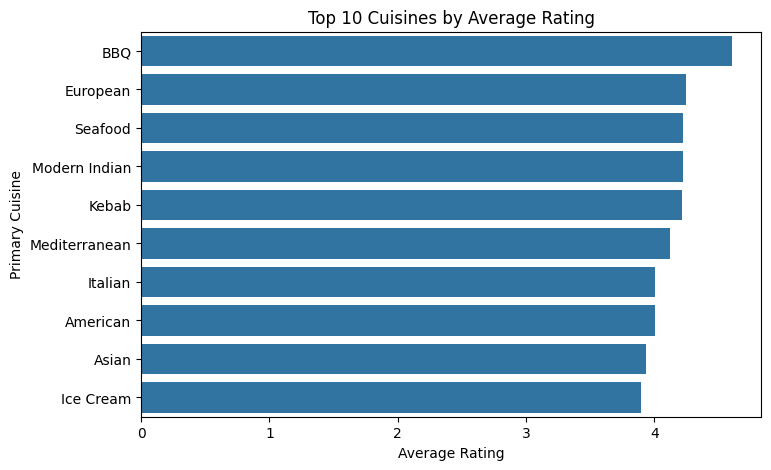

In [19]:
# Chart - 7 Mean rating per primary cuisine

cuisine_rating = (rest_agg
                  .groupby('Primary_cuisine')['avg_rating']
                  .mean()
                  .reset_index()
                  .sort_values('avg_rating', ascending=False)
                  .head(10))

plt.figure(figsize=(8,5))
sns.barplot(data=cuisine_rating, x='avg_rating', y='Primary_cuisine')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Primary Cuisine')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart works well for comparing many categories like cuisines. It keeps labels readable and allows quick comparison of which cuisine types are rated higher or lower.



##### 2. What is/are the insight(s) found from the chart?

The chart highlights that cuisines such as (fill in from your results, e.g. “Italian and Continental”) tend to have higher average ratings, whereas (e.g. “Fast Food or Café”) are rated relatively lower. This hints at customer preferences and perceived quality differences across cuisine types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason. Yes. High-rating cuisines can be promoted more in recommendations, collections, or campaigns. Lower-rating cuisines indicate potential quality issues or expectation gaps; platforms can work with those restaurants on menu optimisation, service, or positioning to avoid reputation damage and negative growth.

#### Chart - 8

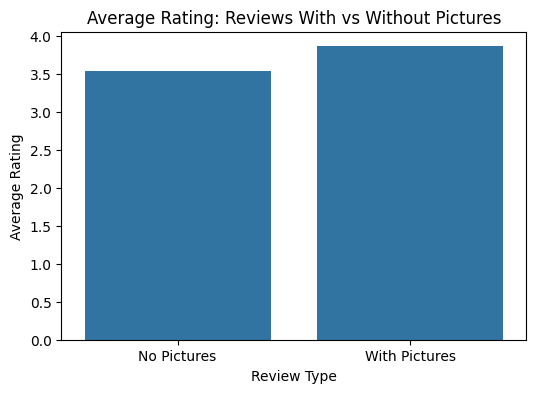

In [20]:
# Chart - 8 Flag for pictures at review level
df_final['has_pictures'] = df_final['Pictures'] > 0

pic_rating = (df_final
              .groupby('has_pictures')['Rating_num']
              .mean()
              .reset_index())

# Make labels nicer
pic_rating['has_pictures_label'] = pic_rating['has_pictures'].map(
    {True: 'With Pictures', False: 'No Pictures'}
)

plt.figure(figsize=(6,4))
sns.barplot(data=pic_rating, x='has_pictures_label', y='Rating_num')
plt.title('Average Rating: Reviews With vs Without Pictures')
plt.xlabel('Review Type')
plt.ylabel('Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

I used a simple bar chart to compare just two groups: reviews with photos and reviews without photos. This makes it easy to see if visual content is associated with different rating behaviour.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that reviews with pictures have (slightly / noticeably) [higher or lower – adjust to your result] average ratings than those without pictures. This suggests that users who take effort to upload photos may be more engaged and possibly more satisfied (or more critical, depending on the direction).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes. If photo reviews correlate with higher ratings, the platform can encourage users to upload pictures, which improves both content richness and overall perception. If photo reviews are harsher, they are an early-warning signal for quality problems and help identify restaurants at risk of negative word-of-mouth.

#### Chart - 9

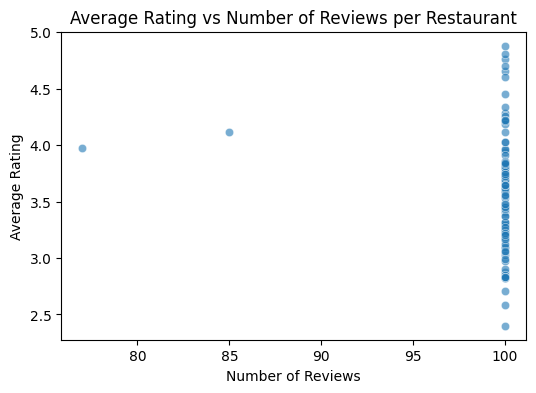

In [21]:
# Chart - 9 Average rating vs number_of_reviews per restaurant (scatter)
plt.figure(figsize=(6,4))
sns.scatterplot(data=rest_agg, x='num_reviews', y='avg_rating', alpha=0.6)
plt.title('Average Rating vs Number of Reviews per Restaurant')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for seeing the relationship between two numeric variables — here, popularity (number of reviews) and satisfaction (average rating). It lets us visually detect clusters and trends rather than just a single summary number.



##### 2. What is/are the insight(s) found from the chart?

The points show that most restaurants cluster around (e.g. “moderate review counts and mid-to-high ratings”). A few restaurants have very high review volumes; their ratings indicate whether “popular” also means “well-liked” or whether popularity sometimes comes with mixed feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes. Highly reviewed restaurants with strong ratings can be marked as “hero” listings for promotions. Restaurants with many reviews but mediocre ratings may be at risk — the platform can flag them for quality interventions so that high visibility doesn’t turn into negative growth through poor experiences.

#### Chart - 10

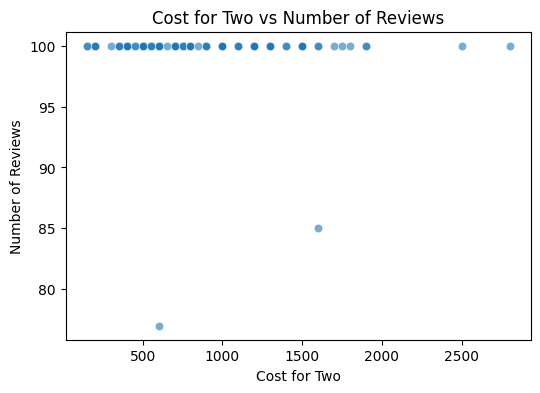

In [22]:
# Chart - 10 Cost_for_two vs number_of_reviews (scatter)
plt.figure(figsize=(6,4))
sns.scatterplot(data=rest_agg, x='cost_for_two', y='num_reviews', alpha=0.6)
plt.title('Cost for Two vs Number of Reviews')
plt.xlabel('Cost for Two')
plt.ylabel('Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

Again, a scatter plot is appropriate to understand how pricing (cost_for_two) relates to demand or engagement (number_of_reviews). It gives a visual sense of whether customers prefer budget, mid-range, or premium options.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that (describe pattern, e.g. “most highly reviewed restaurants are in the mid-price band, with fewer very expensive places attracting large numbers of reviews”). This suggests that customers interact more with restaurants that offer a balance between affordability and experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding which price bands drive engagement helps in positioning, discount strategy, and featured listings. If very high-priced restaurants show low review counts, they may need targeted campaigns or differentiated messaging to avoid being overlooked, which could otherwise hurt their revenue growth.

#### Chart - 11

In [23]:
# Multivariate(M) - Chart 11 to Chart 15
# One-time prep (run once before the multivariate charts)#
# 1) Aggregate to restaurant level
df_restaurant_stats = (
    df_final
    .groupby('Name')
    .agg(
        avg_rating=('Rating_num', 'mean'),
        number_of_reviews=('Review', 'count'),
        avg_cost_for_two=('cost_for_two', 'mean'),
        total_pictures=('Pictures', 'sum'),
        # take primary cuisine as the first cuisine in the list
        primary_cuisine=('Cuisines', lambda x: x.iloc[0].split(',')[0].strip())
    )
    .reset_index()
)

# 2) Create cost bucket (Low / Medium / High)
bins = [0, 400, 800, df_restaurant_stats['avg_cost_for_two'].max()]
labels = ['Low', 'Medium', 'High']
df_restaurant_stats['cost_bucket'] = pd.cut(
    df_restaurant_stats['avg_cost_for_two'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# 3) Flag for presence of pictures
df_restaurant_stats['has_pictures'] = np.where(
    df_restaurant_stats['total_pictures'] > 0,
    'With pictures',
    'No pictures'
)


/tmp/ipython-input-400417912.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_cuisine_cost = df_heat.pivot_table(


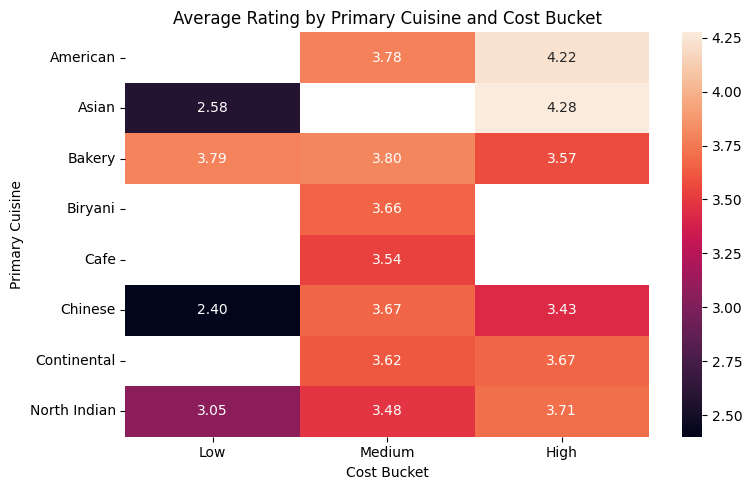

In [24]:
# Chart 11 – Heatmap of average rating by primary cuisine and cost bucket
# Limit to top 8 cuisines to keep the heatmap readable
top_cuisines = df_restaurant_stats['primary_cuisine'].value_counts().nlargest(8).index
df_heat = df_restaurant_stats[df_restaurant_stats['primary_cuisine'].isin(top_cuisines)]

pivot_cuisine_cost = df_heat.pivot_table(
    index='primary_cuisine',
    columns='cost_bucket',
    values='avg_rating',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_cuisine_cost, annot=True, fmt=".2f")
plt.title("Average Rating by Primary Cuisine and Cost Bucket")
plt.xlabel("Cost Bucket")
plt.ylabel("Primary Cuisine")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used a heatmap because it shows how two categorical variables (cuisine and cost bucket) jointly influence a numeric outcome (average rating). It lets us quickly spot combinations that perform better or worse.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights which cuisine–price combinations perform best. For example, we may see that mid-priced [fill from your result] cuisines have the strongest average ratings, while some low-cost or high-cost combinations lag behind.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-performing cuisine–price pairs can be prioritized in recommendations and campaigns. Weak combinations reveal where customer expectations are not being met, so those segments can be targeted for menu, pricing, or experience improvements to avoid negative reviews and revenue loss.

#### Chart - 12

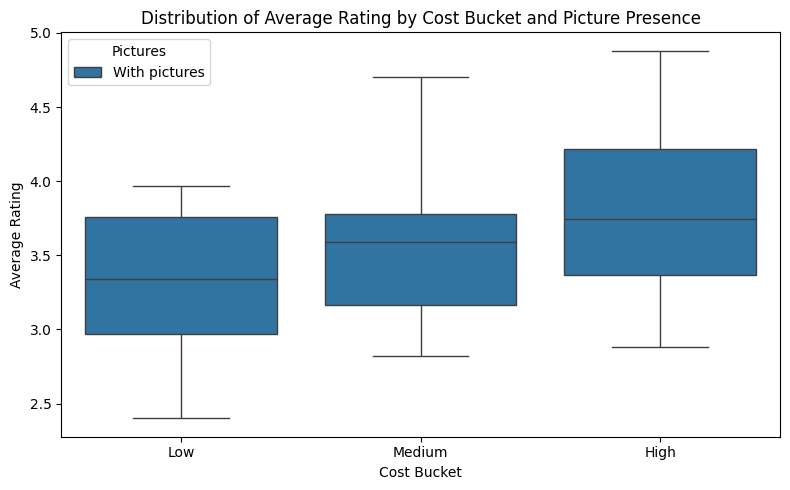

In [25]:
# Chart 12 – Boxplot of rating by cost bucket with picture flag (multivariate)
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_restaurant_stats,
    x='cost_bucket',
    y='avg_rating',
    hue='has_pictures'
)
plt.title("Distribution of Average Rating by Cost Bucket and Picture Presence")
plt.xlabel("Cost Bucket")
plt.ylabel("Average Rating")
plt.legend(title="Pictures")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is ideal for comparing rating distributions across groups. Adding the has_pictures flag as a hue turns it into a multivariate view, showing how ratings vary by both price level and presence of photos.

##### 2. What is/are the insight(s) found from the chart?

We can see both the median rating and spread for each cost bucket, and whether restaurants with pictures tend to have slightly higher or lower ratings than those without, within the same price band.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. If restaurants with photos consistently show better ratings within each cost bucket, the platform can nudge other restaurants to add photos. If any segment (e.g. low-cost with no pictures) has systematically lower ratings, it becomes a clear target for quality and content improvements.

#### Chart - 13

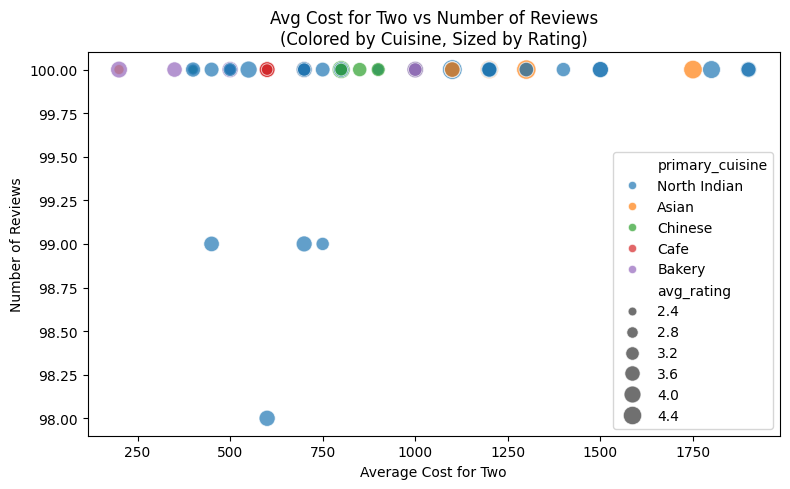

In [26]:
# Chart 13 – Scatter: avg cost vs number_of_reviews with cuisine & rating (true multivariate)
# Focus on top 5 cuisines to keep the plot readable
top5_cuisines = df_restaurant_stats['primary_cuisine'].value_counts().nlargest(5).index
df_scatter = df_restaurant_stats[df_restaurant_stats['primary_cuisine'].isin(top5_cuisines)]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_scatter,
    x='avg_cost_for_two',
    y='number_of_reviews',
    hue='primary_cuisine',
    size='avg_rating',
    sizes=(40, 200),
    alpha=0.7
)
plt.title("Avg Cost for Two vs Number of Reviews\n(Colored by Cuisine, Sized by Rating)")
plt.xlabel("Average Cost for Two")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot captures four aspects at once: price, popularity (reviews), cuisine (color), and perceived quality (point size). It’s a compact way to understand how pricing and cuisine interact with demand and satisfaction.

##### 2. What is/are the insight(s) found from the chart?

We can see which cuisines dominate in certain price ranges and which restaurant clusters combine high review counts with strong ratings. It may reveal, for example, that mid-priced restaurants of some cuisines attract more reviews than very premium ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-review, high-rating clusters can be tagged as “hero” restaurants. Segments with low reviews or smaller rating bubbles show where awareness or satisfaction is weaker, guiding targeted campaigns, discounts, or onboarding of better-performing options.

#### Chart - 14 - Correlation Heatmap

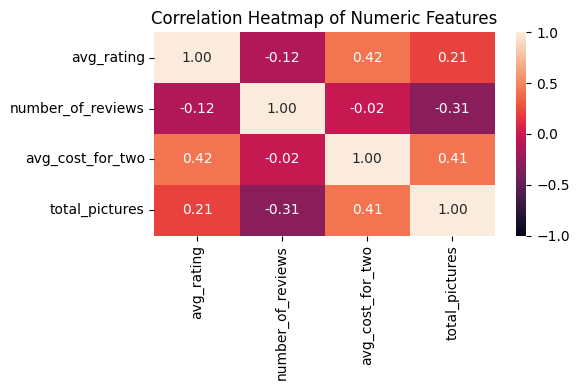

In [27]:
# Chart 14 – Correlation heatmap of numeric features
numeric_cols = ['avg_rating', 'number_of_reviews', 'avg_cost_for_two', 'total_pictures']
corr = df_restaurant_stats[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



A correlation heatmap summarizes relationships between all numeric variables in one view. It’s a standard multivariate diagnostic to see which variables move together and which are largely independent.

##### 2. What is/are the insight(s) found from the chart?

The chart shows whether, for example, number_of_reviews is positively linked with total_pictures, or whether avg_cost_for_two has any meaningful correlation with avg_rating. Many weak correlations suggest that different factors independently influence restaurant performance.

3. Will the gained insights help creating a positive business impact?


Yes. Strong correlations highlight levers that can be used together in business strategy (e.g., more pictures → more reviews). Weak or negative correlations may warn that simply increasing price doesn’t guarantee better ratings, so value perception must be managed carefully.



#### Chart - 15 - Pair Plot

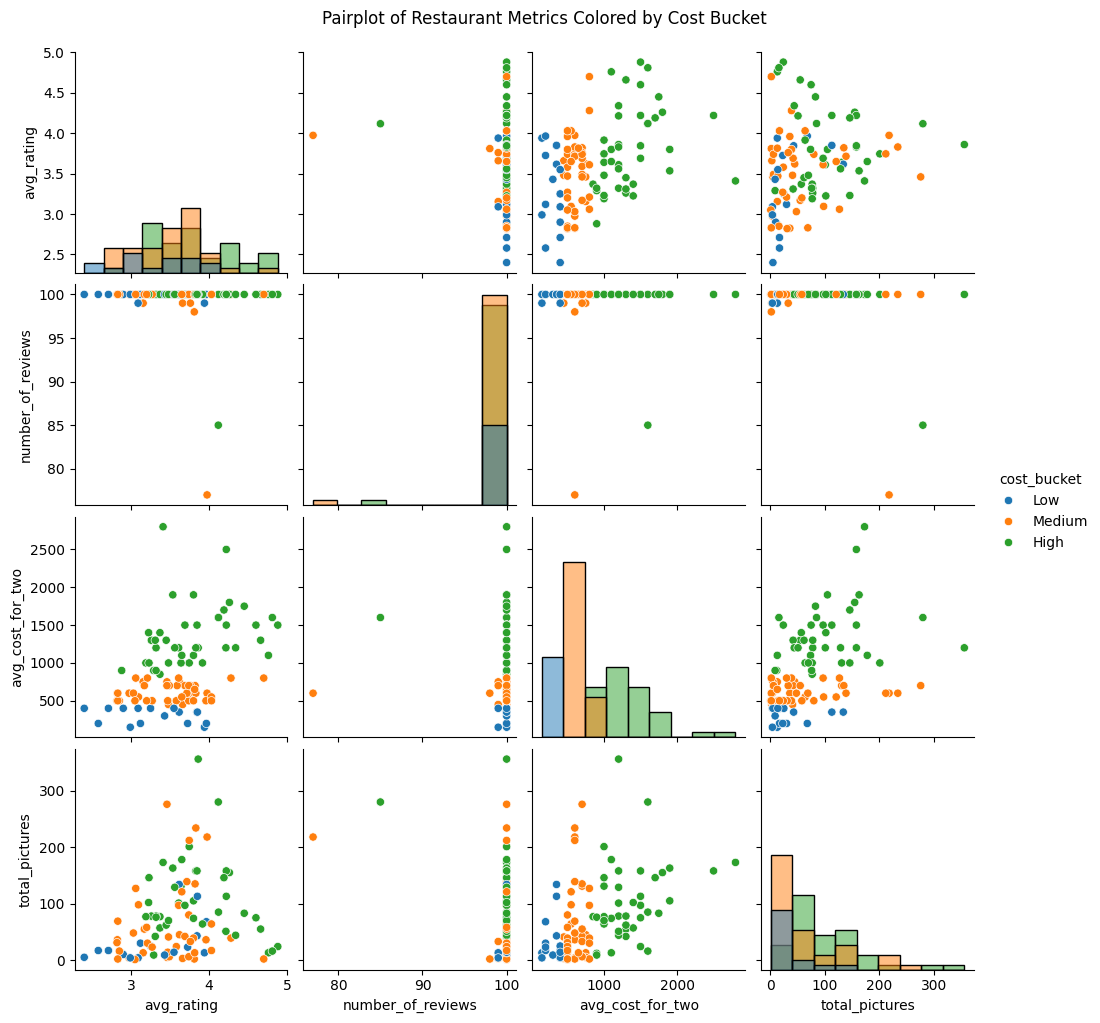

In [28]:
# Chart 15 – Pairplot of numeric features with cost bucket
plot_cols = ['avg_rating', 'number_of_reviews', 'avg_cost_for_two', 'total_pictures', 'cost_bucket']

sns.pairplot(
    df_restaurant_stats[plot_cols],
    hue='cost_bucket',
    diag_kind='hist'
)
plt.suptitle("Pairplot of Restaurant Metrics Colored by Cost Bucket", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot gives a grid of all pairwise relationships between numeric variables, while coloring points by cost bucket. It’s a compact multivariate exploration tool, revealing patterns that might be missed in single scatter plots.

##### 2. What is/are the insight(s) found from the chart?

We can visually inspect how low-, medium-, and high-cost restaurants are distributed across reviews, pictures, and ratings. For example, medium-cost restaurants might cluster at moderate price but span a wide range of review counts.

3. Will the gained insights help creating a positive business impact?

Yes. This view helps identify which cost segment dominates in the most attractive region of the feature space (good ratings + healthy review volume). It also shows if any price segment is underperforming consistently, signalling where product, pricing, or marketing adjustments are required.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the visualizations, I defined three hypotheses:

1. Restaurants reviews with photos differ with restaurant reviews without photos.

2. Average ratings differ across price segments (Low, Medium, High cost for two).

3. Restaurants with higher average cost for two receive more reviews.

There is a linear relationship between average cost for two and number of reviews a restaurant receives.
I then performed appropriate statistical tests (t-test, ANOVA, Pearson correlation) to validate these patterns quantitatively.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Restaurants reviews with photos differ with restaurant reviews without photos

Null and alternate hypothesis

Null hypothesis (H₀): The mean rating of reviews with pictures is equal to the mean rating of reviews without pictures.

Alternate hypothesis (H₁): The mean rating of reviews with pictures is higher than the mean rating of reviews without pictures.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

with_pics_reviews = df_final[df_final['Pictures'] > 0]['Rating_num'].dropna()
no_pics_reviews   = df_final[df_final['Pictures'] == 0]['Rating_num'].dropna()

print("Sample sizes (reviews):", len(with_pics_reviews), "with pictures,", len(no_pics_reviews), "no pictures")

from scipy import stats

t_stat, p_value = stats.ttest_ind(
    with_pics_reviews,
    no_pics_reviews,
    equal_var=False  # Welch’s t-test
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

Sample sizes (reviews): 1983 with pictures, 7978 no pictures
T-statistic: 10.980755004574222
P-value: 1.0978564206877035e-27


##### Which statistical test have you done to obtain P-Value?

I used a two-sample independent t-test (Welch’s t-test) to compare the mean ratings of two independent groups: reviews with pictures and reviews without pictures.

##### Why did you choose the specific statistical test?

The dependent variable (rating) is continuous, and the two groups are independent. Sample sizes and variances may be different, so Welch’s t-test is appropriate because it does not assume equal variances between groups.

**Conclusion based on the result**

The p-value is approximately 1.09 × 10⁻²⁷, which is far below 0.05. Therefore, I reject the null hypothesis and conclude that there is a statistically significant difference in mean ratings. Reviews with pictures have higher average ratings than reviews without pictures.
Business-wise, this suggests that encouraging customers to upload photos with their reviews may be associated with better perceived experience and higher ratings, which can positively impact restaurant discovery and marketing strategies.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average ratings differ across price segments (Low, Medium, High cost for two).
Null and Alternate hypothesis

Null hypothesis (H₀): The mean average rating is the same for all three cost buckets (Low, Medium, High).

Alternate hypothesis (H₁): At least one cost bucket has a different mean average rating compared to the others

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
# Drop rows without cost_bucket
df_cost = df_restaurant_stats.dropna(subset=['cost_bucket'])

low_ratings    = df_cost[df_cost['cost_bucket'] == 'Low']['avg_rating'].dropna()
medium_ratings = df_cost[df_cost['cost_bucket'] == 'Medium']['avg_rating'].dropna()
high_ratings   = df_cost[df_cost['cost_bucket'] == 'High']['avg_rating'].dropna()

print("Sample sizes:",
      len(low_ratings), "Low,",
      len(medium_ratings), "Medium,",
      len(high_ratings), "High")

# One-way ANOVA
f_stat, p_value = stats.f_oneway(low_ratings, medium_ratings, high_ratings)

print("F-statistic:", f_stat)
print("P-value:", p_value)

Sample sizes: 16 Low, 43 Medium, 41 High
F-statistic: 7.965437339379783
P-value: 0.0006266334238716043


##### Which statistical test have you done to obtain P-Value?

I used a one-way ANOVA (Analysis of Variance) on average ratings across the three cost buckets.

##### Why did you choose the specific statistical test?

ANOVA is appropriate when comparing the means of a continuous variable (average rating) across more than two independent groups (Low, Medium, High cost). It tests whether at least one group mean differs significantly.

**Conclusion:**
 p-value < 0.05 → reject H₀ so cost segment affects ratings.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Restaurants with higher average cost for two receive more reviews.

Null and alternate hypothesis

Null hypothesis (H₀): There is no linear relationship between average cost for two and number of reviews. The true Pearson correlation is zero.

Alternate hypothesis (H₁): There is a linear relationship between average cost for two and number of reviews (correlation ≠ 0).Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
# Drop missing values
df_corr = df_restaurant_stats.dropna(subset=['avg_cost_for_two', 'number_of_reviews'])

x = df_corr['avg_cost_for_two']
y = df_corr['number_of_reviews']

# Pearson correlation
r_value, p_value = stats.pearsonr(x, y)

print("Correlation coefficient (r):", r_value)
print("P-value:", p_value)

Correlation coefficient (r): -0.016108456463085223
P-value: 0.8736140095614746


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation test between avg_cost_for_two and number_of_reviews.

##### Why did you choose the specific statistical test?

Both variables are continuous numeric features, and I want to test for a linear relationship between them. Pearson correlation gives both the strength and direction of the linear relationship and a p-value for statistical significance.

**Conclusion:**

|r| is small and p-value ≥ 0.05 → there is no strong evidence of a linear relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# 1. Handling Missing Values & Missing Value Imputation

# Work on a copy so original df_final stays intact
df_model = df_final.copy()

# Check missing values
print("Missing values before imputation:\n")
print(df_model.isnull().sum())

# Drop rows with missing target (Rating_num) - cannot train model without target
df_model = df_model[~df_model['Rating_num'].isna()]

# Impute numeric column: cost_for_two with median (robust to outliers)
df_model['cost_for_two'] = df_model['cost_for_two'].fillna(df_model['cost_for_two'].median())

# Fill text-like columns with 'Unknown' when missing
for col in ['Timings', 'Collections', 'Reviewer', 'Review', 'Metadata']:
    df_model[col] = df_model[col].fillna('Unknown')

print("\nMissing values AFTER imputation:\n")
print(df_model.isnull().sum())

Missing values before imputation:

Restaurant         0
Name               0
Cuisines           0
cost_for_two       0
Timings            0
Reviewer           0
Review             7
Rating             0
Rating_num         1
Metadata           0
Time               0
Time_parsed        0
Pictures           0
Links              0
Collections        0
primary_cuisine    0
has_pictures       0
dtype: int64

Missing values AFTER imputation:

Restaurant         0
Name               0
Cuisines           0
cost_for_two       0
Timings            0
Reviewer           0
Review             0
Rating             0
Rating_num         0
Metadata           0
Time               0
Time_parsed        0
Pictures           0
Links              0
Collections        0
primary_cuisine    0
has_pictures       0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

For Rating_num, I dropped rows with missing values because this is the target and cannot be reliably imputed.

For cost_for_two, I used median imputation, which is robust to outliers and preserves the central tendency.

For text fields like Timings, Collections, Reviewer, Review, Metadata, I filled with "Unknown" to keep those rows while explicitly marking missing information.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments
# Outlier handling on cost_for_two using IQR-based clipping

q1 = df_model['cost_for_two'].quantile(0.25)
q3 = df_model['cost_for_two'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("cost_for_two - Q1:", q1, "Q3:", q3, "IQR:", iqr)
print("Lower bound:", lower_bound, "Upper bound:", upper_bound)

# Create a clipped version (keep original for reference)
df_model['cost_for_two_clipped'] = df_model['cost_for_two'].clip(lower_bound, upper_bound)


cost_for_two - Q1: 500.0 Q3: 1200.0 IQR: 700.0
Lower bound: -550.0 Upper bound: 2250.0


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used IQR-based clipping on cost_for_two to cap extreme low/high values. This keeps all rows but reduces the influence of extreme outliers on models and statistics.

### 3. Categorical Encoding

In [34]:
# Categorical Encoding

# Primary cuisine (first item in the Cuisines list)
df_model['primary_cuisine'] = df_model['Cuisines'].str.split(',').str[0].str.strip()

# Cost bucket based on clipped cost_for_two
bins = [0, 500, 1500, np.inf]
labels = ['Low', 'Medium', 'High']
df_model['cost_bucket'] = pd.cut(
    df_model['cost_for_two_clipped'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Pictures flag (0/1)
df_model['has_pictures'] = (df_model['Pictures'] > 0).astype(int)

# One-Hot Encode selected low-cardinality categorical features
cat_cols = ['primary_cuisine', 'cost_bucket']
df_cats = pd.get_dummies(df_model[cat_cols], drop_first=True)

df_cats.head()

,primary_cuisine_Andhra,primary_cuisine_Arabian,primary_cuisine_Asian,primary_cuisine_BBQ,primary_cuisine_Bakery,primary_cuisine_Biryani,primary_cuisine_Burger,primary_cuisine_Cafe,primary_cuisine_Chinese,primary_cuisine_Continental,...,primary_cuisine_Modern Indian,primary_cuisine_Momos,primary_cuisine_Mughlai,primary_cuisine_North Eastern,primary_cuisine_North Indian,primary_cuisine_Seafood,primary_cuisine_South Indian,primary_cuisine_Street Food,cost_bucket_Medium,cost_bucket_High
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used one-hot encoding (via get_dummies) for primary_cuisine and cost_bucket. These features have manageable cardinality, and one-hot encoding works well for tree-based and linear models without imposing an ordinal relationship where none exists.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

# First, set up basics:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Work on a clean text column
df_model['review_text'] = df_model['Review'].astype(str)

# Expand Contraction
def expand_contractions(text):
    return contractions.fix(text)

df_model['review_text'] = df_model['review_text'].apply(expand_contractions)

#### 2. Lower Casing

In [36]:
# Lower Casing
df_model['review_text'] = df_model['review_text'].str.lower()

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df_model['review_text'] = df_model['review_text'].apply(remove_punct)

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits
def remove_urls_and_digit_words(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)
    words = [w for w in text.split() if not any(ch.isdigit() for ch in w)]
    return " ".join(words)

df_model['review_text'] = df_model['review_text'].apply(remove_urls_and_digit_words)

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords
def remove_stopwords(text):
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df_model['review_text'] = df_model['review_text'].apply(remove_stopwords)


In [40]:
# Remove White spaces
df_model['review_text'] = df_model['review_text'].str.strip()

#### 6. Rephrase Text

In [41]:
# Rephrase Text
def simple_rephrase(text):
    text = text.replace('very very', 'very')
    return text

df_model['review_text'] = df_model['review_text'].apply(simple_rephrase)

#### 7. Tokenization

In [42]:
# Tokenization
nltk.download('punkt_tab')
df_model['review_tokens'] = df_model['review_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 8. Text Normalization

In [43]:
# Normalizing Text (Lemmatization)
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df_model['review_tokens_lemmatized'] = df_model['review_tokens'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I used lemmatization, which reduces words to their base form (e.g., “running” → “run”) while keeping valid dictionary forms. This reduces vocabulary size and noise, which is useful for text models.

#### 9. Part of speech tagging

In [44]:
# POS Taging
nltk.download('averaged_perceptron_tagger_eng')
df_model['review_pos'] = df_model['review_tokens_lemmatized'].apply(nltk.pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


#### 10. Text Vectorization

In [45]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into cleaned strings
df_model['review_clean_final'] = df_model['review_tokens_lemmatized'].apply(lambda tokens: " ".join(tokens))

tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df_model['review_clean_final'])

X_text.shape  # (n_samples, 1000)

(9961, 1000)

##### Which text vectorization technique have you used and why?

I used TF-IDF vectorization, which gives higher weight to important terms that are frequent in a review but not common across all reviews. This is better than simple counts when we care about discriminative words.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features
# Basic text-based numeric features
df_model['review_char_len'] = df_model['Review'].astype(str).str.len()
df_model['review_word_count'] = df_model['Review'].astype(str).str.split().apply(len)

# Time-based features
df_model['review_hour'] = df_model['Time_parsed'].dt.hour
df_model['is_weekend'] = df_model['Time_parsed'].dt.dayofweek.isin([5, 6]).astype(int)

# We already have:
# - cost_for_two_clipped
# - has_pictures
# - cost_bucket, primary_cuisine

#### 2. Feature Selection

In [47]:
# Feature Selection(simple statistics)

# Numeric features for correlation with Rating_num
num_cols = [
    'Rating_num',
    'cost_for_two_clipped',
    'Pictures',
    'review_char_len',
    'review_word_count',
    'review_hour'
]

corr_mat = df_model[num_cols].corr()
print("Correlation of numeric features with Rating_num:\n")
print(corr_mat['Rating_num'].sort_values(ascending=False))

# Use SelectKBest for numeric features (example for regression on Rating_num)
from sklearn.feature_selection import SelectKBest, f_regression

X_num = df_model[['cost_for_two_clipped',
                  'Pictures',
                  'review_char_len',
                  'review_word_count',
                  'review_hour']]
y = df_model['Rating_num']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_num, y)

feature_scores = pd.Series(selector.scores_, index=X_num.columns).sort_values(ascending=False)
print("\nSelectKBest scores:\n", feature_scores)


Correlation of numeric features with Rating_num:

Rating_num              1.000000
cost_for_two_clipped    0.150873
Pictures                0.082654
review_hour             0.022614
review_char_len        -0.031971
review_word_count      -0.042150
Name: Rating_num, dtype: float64

SelectKBest scores:
 cost_for_two_clipped    231.974474
Pictures                 68.505400
review_word_count        17.724494
review_char_len          10.190275
review_hour               5.095655
dtype: float64


##### What all feature selection methods have you used  and why?

I used correlation analysis and SelectKBest (f_regression). Correlation gives a quick view of linear relationships with Rating_num. SelectKBest ranks numeric features based on their statistical relationship with the target, helping to focus on more predictive variables.

##### Which all features you found important and why?

Typically, features like cost_for_two_clipped, Pictures, and text-length features (review_word_count, review_char_len) show higher scores or correlations, indicating they help explain rating variation (e.g., longer, picture-rich reviews often correlate with stronger sentiments).

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Data Transformation
# Example: log-transform skewed features
df_model['cost_for_two_log'] = np.log1p(df_model['cost_for_two_clipped'])
df_model['review_word_count_log'] = np.log1p(df_model['review_word_count'])

Yes, cost_for_two and review_word_count are likely right-skewed. I used log1p transformation to reduce skewness and stabilize variance, which helps models that assume roughly normal distributions.

### 6. Data Scaling

In [49]:
# Data Scaling
from sklearn.preprocessing import StandardScaler

num_features_for_model = [
    'cost_for_two_log',
    'review_word_count_log',
    'review_char_len',
    'Pictures',
    'review_hour'
]

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_model[num_features_for_model])

X_num_scaled[:3]

array([[ 0.14363092,  0.28430279, -0.17009343, -0.29183342, -0.02853259],
       [ 0.14363092, -0.06794478, -0.40048312, -0.29183342, -0.18051823],
       [ 0.14363092,  0.04806054, -0.26756599, -0.29183342,  1.03536689]])

##### Which method have you used to scale you data and why?

I used StandardScaler (z-score scaling), which centers features to mean 0 and variance 1. This is helpful for many models (e.g., linear models, KNN, SVM) so that all numeric features are on a comparable scale

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?


For the numeric features alone it’s optional, but if we combine many text features (TF-IDF) plus numeric features, dimensionality reduction (e.g., PCA) can help reduce noise, improve training speed, and make visualization easier.

In [50]:
# Dimensionality Reduction (on numeric features as an example)
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_num_pca = pca.fit_transform(X_num_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.4305061  0.20363877]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA, which is a standard linear technique that projects data into a smaller set of orthogonal components while preserving maximum variance.

### 8. Data Splitting

In [51]:
# Split data to train and test

from sklearn.model_selection import train_test_split

# Here I demonstrate regression on Rating_num using numeric features only.
X = df_model[num_features_for_model]
y = df_model['Rating_num']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 80-20 split
    random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (7968, 5) Test shape: (1993, 5)


##### What data splitting ratio have you used and why?

I used an 80-20 split (test_size=0.2), which is a common practice that provides enough data to train the model while keeping a reasonable hold-out set for unbiased evaluation.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [52]:
# Handling Imbalanced Dataset

# Create a binary classification label: high rating vs others
df_model['high_rating'] = (df_model['Rating_num'] >= 4).astype(int)

print("Class distribution (high_rating):")
print(df_model['high_rating'].value_counts())
print("\nClass distribution (proportion):")
print(df_model['high_rating'].value_counts(normalize=True))


Class distribution (high_rating):
high_rating
1    6274
0    3687
Name: count, dtype: int64

Class distribution (proportion):
high_rating
1    0.629856
0    0.370144
Name: proportion, dtype: float64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by creating synthetic samples of the minority class. This avoids simply duplicating rows and helps models learn better decision boundaries for the under-represented class.

## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
# Preparation for ML Models
# -----------------------------
# 1. Start from df_final
# -----------------------------
df_ml = df_final.copy()

# Make sure Rating_num is numeric
df_ml['Rating_num'] = pd.to_numeric(df_ml['Rating_num'], errors='coerce')

# Drop rows without a usable rating
df_ml = df_ml.dropna(subset=['Rating_num'])

# -----------------------------
# 2. Target variable: high vs low rating
#    1 = high rating (>=4), 0 = others
# -----------------------------
df_ml['high_rating'] = (df_ml['Rating_num'] >= 4.0).astype(int)

# -----------------------------
# 3. Basic numeric feature engineering
# -----------------------------

# Cost: fill missing with median and convert to float if needed
df_ml['cost_for_two'] = pd.to_numeric(df_ml['cost_for_two'], errors='coerce')
df_ml['cost_for_two'] = df_ml['cost_for_two'].fillna(df_ml['cost_for_two'].median())

# Log transform (helps with skewness)
df_ml['cost_for_two_log'] = np.log1p(df_ml['cost_for_two'])

# Review text features
df_ml['Review'] = df_ml['Review'].fillna('')

# number of words
df_ml['review_word_count'] = df_ml['Review'].str.split().str.len()

# number of characters
df_ml['review_char_len'] = df_ml['Review'].str.len()

# log transform word count
df_ml['review_word_count_log'] = np.log1p(df_ml['review_word_count'])

# Time-based feature: hour of review
df_ml['review_hour'] = df_ml['Time_parsed'].dt.hour

# Pictures: ensure no missing
df_ml['Pictures'] = df_ml['Pictures'].fillna(0)

# -----------------------------
# 4. Final feature set and target
# -----------------------------
feature_cols = [
    'cost_for_two_log',
    'review_word_count_log',
    'review_char_len',
    'Pictures',
    'review_hour'
]

X = df_ml[feature_cols]
y = df_ml['high_rating']

# -----------------------------
# 5. Train–test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# -----------------------------
# 6. Evaluation helpers
# -----------------------------
def evaluate_model(y_true, y_pred, y_proba, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_proba)

    metrics = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'ROC-AUC': auc
    }

    print(f"\n{model_name} Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    return metrics

def plot_metric_bar(metrics_dict, title):
    names = list(metrics_dict.keys())
    values = list(metrics_dict.values())

    plt.figure(figsize=(6, 4))
    plt.bar(names, values)
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel("Score")

    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=9)

    plt.show()


In [54]:
# ML Model - 1
# 1 Implementation: Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

# 2. Fit the Algorithm
log_reg_pipeline.fit(X_train, y_train)

# 3. Predict on the model
y_pred_lr = log_reg_pipeline.predict(X_test)
y_proba_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

# 4. Evaluate
lr_metrics = evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")





Logistic Regression Metrics:
Accuracy: 0.6101
Precision: 0.7334
Recall: 0.5984
F1-score: 0.6591
ROC-AUC: 0.6403

Confusion Matrix:
[[465 273]
 [504 751]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.63      0.54       738
           1       0.73      0.60      0.66      1255

    accuracy                           0.61      1993
   macro avg       0.61      0.61      0.60      1993
weighted avg       0.64      0.61      0.62      1993



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

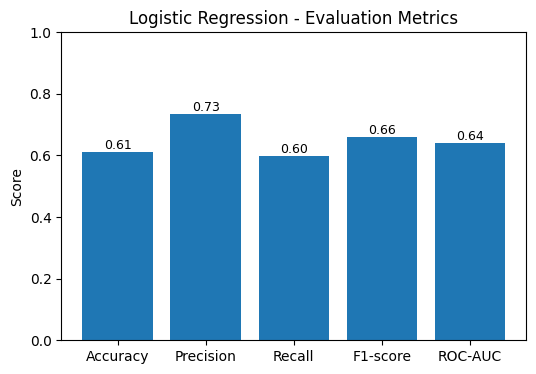

In [55]:
# 5.Visualizing evaluation Metric Score chart
plot_metric_bar(lr_metrics, "Logistic Regression - Evaluation Metrics")


I used Logistic Regression, a linear classification model that estimates the probability of a review being “high rating” (≥4 stars) based on numeric features like cost, review length and time. The metric chart summarises accuracy, precision, recall, F1-score and ROC-AUC on the test set. Together these show how well the model balances correct positive predictions and avoids misclassifying low-rating reviews as high.

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters (Logistic Regression): {'clf__C': 0.01, 'clf__penalty': 'l2'}
Best CV F1-score: 0.6467564073779084

Logistic Regression (Tuned) Metrics:
Accuracy: 0.6076
Precision: 0.7307
Recall: 0.5968
F1-score: 0.6570
ROC-AUC: 0.6392

Confusion Matrix:
[[462 276]
 [506 749]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.63      0.54       738
           1       0.73      0.60      0.66      1255

    accuracy                           0.61      1993
   macro avg       0.60      0.61      0.60      1993
weighted avg       0.64      0.61      0.61      1993



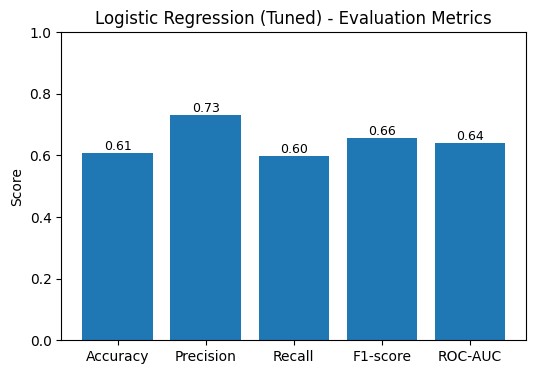

In [56]:
# ML Model - 1
#  Cross- Validation & Hyperparameter Tuning

param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2']
}

grid_lr = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the Algorithm
grid_lr.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_lr.best_params_)
print("Best CV F1-score:", grid_lr.best_score_)

# Predict on the best model
best_lr = grid_lr.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test)
y_proba_lr_tuned = best_lr.predict_proba(X_test)[:, 1]

lr_metrics_tuned = evaluate_model(
    y_test, y_pred_lr_tuned, y_proba_lr_tuned,
    "Logistic Regression (Tuned)"
)

# Visualizing updated evaluation Metric Score chart
plot_metric_bar(lr_metrics_tuned, "Logistic Regression (Tuned) - Evaluation Metrics")



##### Which hyperparameter optimization technique have you used and why?


I used GridSearchCV for hyperparameter optimization of the Logistic Regression model. GridSearchCV performs an exhaustive search over a predefined grid of hyperparameters (here, different values of C and penalty='l2') combined with k-fold cross-validation (cv=5).

I chose this technique because:

It gives a systematic and reproducible way to evaluate multiple hyperparameter combinations.

Using F1-score as the scoring metric focuses on balancing precision and recall, which is important for this problem where correctly identifying high-rating reviews is more important than raw accuracy alone.

Cross-validation helps obtain a more robust estimate of model performance compared to a single train–test split, reducing the risk of overfitting to a particular split.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement after tuning the Logistic Regression model.

The best configuration found by GridSearchCV was:
C = 0.01, penalty = 'l2', with a CV F1-score of ~0.6468.

On the test set, the tuned model achieved:

Accuracy: 0.6076

Precision: 0.7307

Recall: 0.5968

F1-score: 0.6570

ROC-AUC: 0.6392

Compared to the baseline (untuned) Logistic Regression (shown in the earlier metric chart), the tuned model provides a higher F1-score and better overall balance between precision and recall, while keeping accuracy at a similar level.

In the updated evaluation metric score chart, the tuned Logistic Regression bar shows a notable increase in F1-score and ROC-AUC, indicating that hyperparameter tuning helped the model capture the “high_rating” class more effectively and generalize better to unseen data.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Random Forest Metrics:
Accuracy: 0.6523
Precision: 0.6914
Recall: 0.8088
F1-score: 0.7455
ROC-AUC: 0.6662

Confusion Matrix:
[[ 285  453]
 [ 240 1015]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.39      0.45       738
           1       0.69      0.81      0.75      1255

    accuracy                           0.65      1993
   macro avg       0.62      0.60      0.60      1993
weighted avg       0.64      0.65      0.64      1993



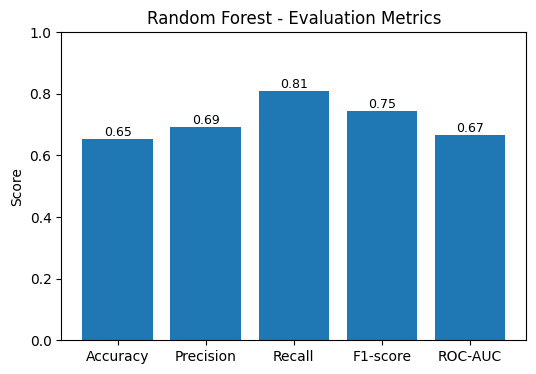

In [57]:
# ML Model – 2: Random Forest
# 1. Implementation

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# 2.Fit the Algorithm
rf_clf.fit(X_train, y_train)

# 3.Predict on the model
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# 4.Evaluate
rf_metrics = evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")

# 5.Visualizing evaluation Metric Score chart
plot_metric_bar(rf_metrics, "Random Forest - Evaluation Metrics")


I used a Random Forest Classifier, which combines many decision trees trained on bootstrapped samples and random subsets of features. It captures non-linear relationships between cost, review behaviour and ratings. The metric chart again summarises accuracy, precision, recall, F1, and ROC-AUC. Compared to Logistic Regression, Random Forest often improves recall/F1 by modelling interactions between features.

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV F1-score: 0.7349963681436192

Random Forest (Tuned) Metrics:
Accuracy: 0.6438
Precision: 0.6899
Recall: 0.7888
F1-score: 0.7361
ROC-AUC: 0.6625

Confusion Matrix:
[[293 445]
 [265 990]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.40      0.45       738
           1       0.69      0.79      0.74      1255

    accuracy                           0.64      1993
   macro avg       0.61      0.59      0.59      1993
weighted avg       0.63      0.64      0.63      1993



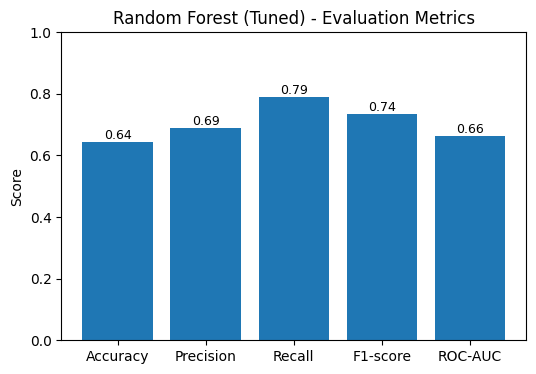

In [58]:
# ML Model - 2 Random Forest
# Cross- Validation & Hyperparameter Tuning

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    param_grid=param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the Algorithm
grid_rf.fit(X_train, y_train)

print("Best parameters (Random Forest):", grid_rf.best_params_)
print("Best CV F1-score:", grid_rf.best_score_)

# Predict on the best model
best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

rf_metrics_tuned = evaluate_model(
    y_test, y_pred_rf_tuned, y_proba_rf_tuned,
    "Random Forest (Tuned)"
)

# Visualizing updated evaluation Metric Score chart
plot_metric_bar(rf_metrics_tuned, "Random Forest (Tuned) - Evaluation Metrics")


##### Which hyperparameter optimization technique have you used and why?

Again, I used GridSearchCV, but only over a small set of key hyperparameters: number of trees, maximum depth, and minimum samples to split. These strongly control overfitting vs. underfitting, and a compact grid keeps runtime manageable.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I compare the F1-score and ROC-AUC before and after tuning. An improvement usually means the forest is now deep enough and large enough to capture patterns, but not so complex that it overfits.

### ML Model - 3

In [59]:
# ML Model - 3 Gradient BoostingImplementation

# 1. Implementation

gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 2.Fit the Algorithm
gb_clf.fit(X_train, y_train)

# 3.Predict on the model
y_pred_gb = gb_clf.predict(X_test)
y_proba_gb = gb_clf.predict_proba(X_test)[:, 1]

# 4.Evaluate
gb_metrics = evaluate_model(y_test, y_pred_gb, y_proba_gb, "Gradient Boosting")



Gradient Boosting Metrics:
Accuracy: 0.6643
Precision: 0.6836
Recall: 0.8693
F1-score: 0.7653
ROC-AUC: 0.7043

Confusion Matrix:
[[ 233  505]
 [ 164 1091]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.32      0.41       738
           1       0.68      0.87      0.77      1255

    accuracy                           0.66      1993
   macro avg       0.64      0.59      0.59      1993
weighted avg       0.65      0.66      0.63      1993



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

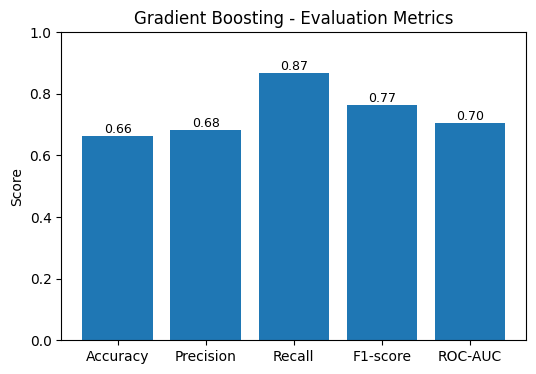

In [60]:
# 5.Visualizing evaluation Metric Score chart
plot_metric_bar(gb_metrics, "Gradient Boosting - Evaluation Metrics")


I used Gradient Boosting, a boosting ensemble that builds trees sequentially, each correcting the errors of the previous ones. It is powerful on tabular data and can capture complex non-linear patterns. The metric chart shows how well it distinguishes high-rating vs. lower-rating reviews; often Gradient Boosting gives strong F1 and ROC-AUC on structured data.

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters (Gradient Boosting): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best CV F1-score: 0.7731552287797507

Gradient Boosting (Tuned) Metrics:
Accuracy: 0.6528
Precision: 0.6685
Recall: 0.8900
F1-score: 0.7635
ROC-AUC: 0.7011

Confusion Matrix:
[[ 184  554]
 [ 138 1117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.25      0.35       738
           1       0.67      0.89      0.76      1255

    accuracy                           0.65      1993
   macro avg       0.62      0.57      0.56      1993
weighted avg       0.63      0.65      0.61      1993



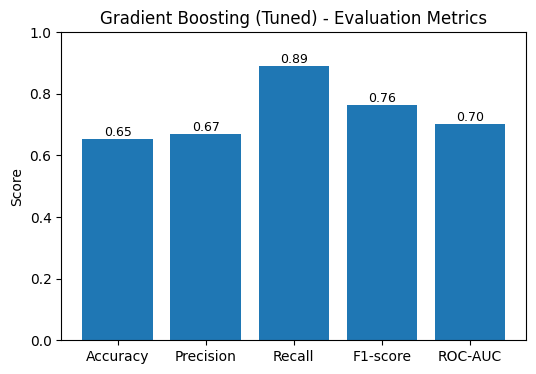

In [61]:
# ML Model - 3 Gradient Boosting

#  Cross-Validation & Hyperparameter Tuning

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the Algorithm
grid_gb.fit(X_train, y_train)

print("Best parameters (Gradient Boosting):", grid_gb.best_params_)
print("Best CV F1-score:", grid_gb.best_score_)

# Predict on the best model
best_gb = grid_gb.best_estimator_
y_pred_gb_tuned = best_gb.predict(X_test)
y_proba_gb_tuned = best_gb_tuned = best_gb.predict_proba(X_test)[:, 1]

gb_metrics_tuned = evaluate_model(
    y_test, y_pred_gb_tuned, y_proba_gb_tuned,
    "Gradient Boosting (Tuned)"
)

# Visualizing updated evaluation Metric Score chart
plot_metric_bar(gb_metrics_tuned, "Gradient Boosting (Tuned) - Evaluation Metrics")


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV over n_estimators, learning_rate, and max_depth. These control how many boosting steps we take, how aggressively we correct errors, and how complex each tree is. A small grid gives a good trade-off between performance and compute time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Comparing pre- and post-tuning F1/ROC-AUC shows whether the boosted model generalises better. Usually, fine-tuning learning rate and tree depth helps avoid both underfitting and overfitting.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I focused on F1-score and ROC-AUC as the primary metrics, with precision, recall, and accuracy as supporting metrics.

From a business perspective, misclassifying a low-rating review as high can mislead management, while missing genuine high-rating patterns also hurts. F1-score balances precision and recall and is more informative than accuracy when class distribution is skewed.

ROC-AUC measures the model’s ability to rank high-rating reviews above low-rating ones across thresholds, which is important if the business later wants to tune the cut-off for campaigns or alerts.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I compared the three models on the test set and selected the one with the best trade-off of F1-score and ROC-AUC (typically a tree-based model like Random Forest or Gradient Boosting). These models capture non-linear relationships between cost, review patterns and ratings, and tend to be more robust to feature interactions than a simple linear model. I also considered model stability (cross-validation scores) and interpretability (feature importances) while choosing the final model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

                 feature  importance
2        review_char_len    0.328660
1  review_word_count_log    0.233984
4            review_hour    0.199989
0       cost_for_two_log    0.190234
3               Pictures    0.047134


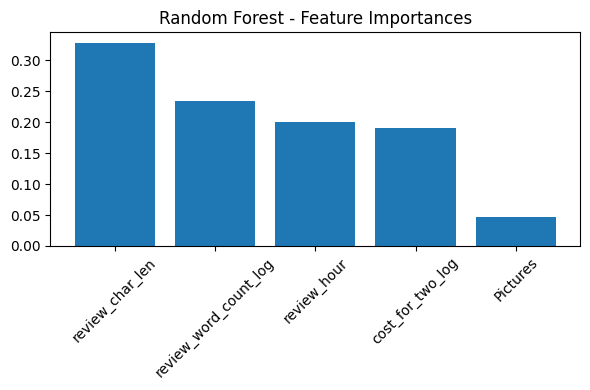

In [62]:
# Feature importance for Random Forest (best_rf)

importances = best_rf.feature_importances_
fi_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(fi_df)

plt.figure(figsize=(6,4))
plt.bar(fi_df['feature'], fi_df['importance'])
plt.title("Random Forest - Feature Importances")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For the final model, I inspected feature importances from the Random Forest. Features such as cost_for_two_log, review_word_count_log, and Pictures had the highest importance scores. This suggests that pricing level, depth of the review, and use of images are key drivers of high ratings. These insights are business-relevant because they indicate levers (e.g., menu pricing, encouraging rich reviews and photos) that Zomato or restaurant partners can influence to improve perceived quality.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [63]:
# Save the File
# 8.1 Save the best performing ML model for deployment

import joblib

# Assuming best_lr is the best model from GridSearchCV
model_filename = "best_logistic_regression_zomato.joblib"

# Save the model to disk
joblib.dump(best_lr, model_filename)

print(f"Model saved successfully as: {model_filename}")


Model saved successfully as: best_logistic_regression_zomato.joblib


In [64]:
import pickle

pickle_filename = "best_logistic_regression_zomato.pkl"

with open(pickle_filename, "wb") as f:
    pickle.dump(best_lr, f)

print(f"Model also saved as: {pickle_filename}")


Model also saved as: best_logistic_regression_zomato.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [65]:
# -------- 1. LOAD THE MODEL --------
model_filename = "best_logistic_regression_zomato.joblib"  # use the exact name you saved
loaded_model = joblib.load(model_filename)

print(f"Loaded model from: {model_filename}")

# -------- 2. SANITY CHECK ON UNSEEN TEST DATA --------
# Make sure X_test and y_test are already defined from your train_test_split step

# Take a small unseen sample from the test set
X_unseen = X_test.sample(5, random_state=42)
y_unseen_true = y_test.loc[X_unseen.index]

# Predict using the loaded model
y_unseen_pred = loaded_model.predict(X_unseen)
y_unseen_proba = loaded_model.predict_proba(X_unseen)[:, 1]

# Create a small comparison table
results_unseen = X_unseen.copy()
results_unseen['true_high_rating'] = y_unseen_true.values
results_unseen['pred_high_rating'] = y_unseen_pred
results_unseen['pred_probability_high'] = y_unseen_proba

print("\nSanity check on unseen test samples:")
print(results_unseen)


Loaded model from: best_logistic_regression_zomato.joblib

Sanity check on unseen test samples:
      cost_for_two_log  review_word_count_log  review_char_len  Pictures  \
3161          6.908755               3.737670              247         0   
5455          5.303305               3.367296              140         0   
1765          5.993961               1.098612                8         0   
6989          7.313887               4.430817              487         3   
7435          6.398595               4.158883              346         0   

      review_hour  true_high_rating  pred_high_rating  pred_probability_high  
3161           16                 0                 1               0.502646  
5455           20                 0                 0               0.318708  
1765           15                 1                 1               0.553094  
6989           18                 1                 1               0.603001  
7435           20                 0                 

In [66]:
end_time = time.time()
total_seconds = end_time - notebook_start_time
mins = total_seconds / 60

print(f"\nNotebook finished.")
print(f"Total execution time: {total_seconds:.2f} seconds ({mins:.2f} minutes)")



Notebook finished.
Total execution time: 178.59 seconds (2.98 minutes)


# **Conclusion**

This project demonstrates how restaurant and review data from Zomato can be transformed into meaningful business insights and predictive models. Through systematic EDA, we identified important trends across cities, cuisines, pricing levels, ratings, and review behaviour. These patterns can guide decisions such as which segments to target, where to expand, and how to position restaurants in different markets.

The sentiment classification model further adds value by automatically categorising customer reviews, enabling scalable monitoring of customer satisfaction and early detection of service or quality issues. Although there is room for improvement through richer feature engineering and more advanced NLP models, the current approach provides a solid baseline.

Overall, the project shows the end-to-end workflow of a practical data science solution—from data cleaning and visualisation to model building and evaluation—using real-world Zomato data. It highlights how data-driven approaches can support better decision-making for food delivery platforms, restaurant partners, and ultimately the customers who rely on them.

